In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
#Loading data
data = pd.read_csv("/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

In [3]:
data.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


In [4]:
#Getting a feel for the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [5]:
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


#EXPLORATORY DATA ANALYSIS

In [6]:
#Unique Categorical Values of Each Column
print("Count \t  Unique Values")
for i in data.columns:
    print()
    print(i)
    print(data[i].nunique(),"\t",data[i].unique())

Count 	  Unique Values

Year
4 	 ['Year 2' 'Year 3' 'Year 1' 'Year 4']

Major
20 	 ['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']

University
10 	 ['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']

Time
10 	 [12 14 11 15 13 17  9 10 16  8]

Order
10 	 ['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print()

Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64

Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64

Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
Uni

In [8]:
data.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

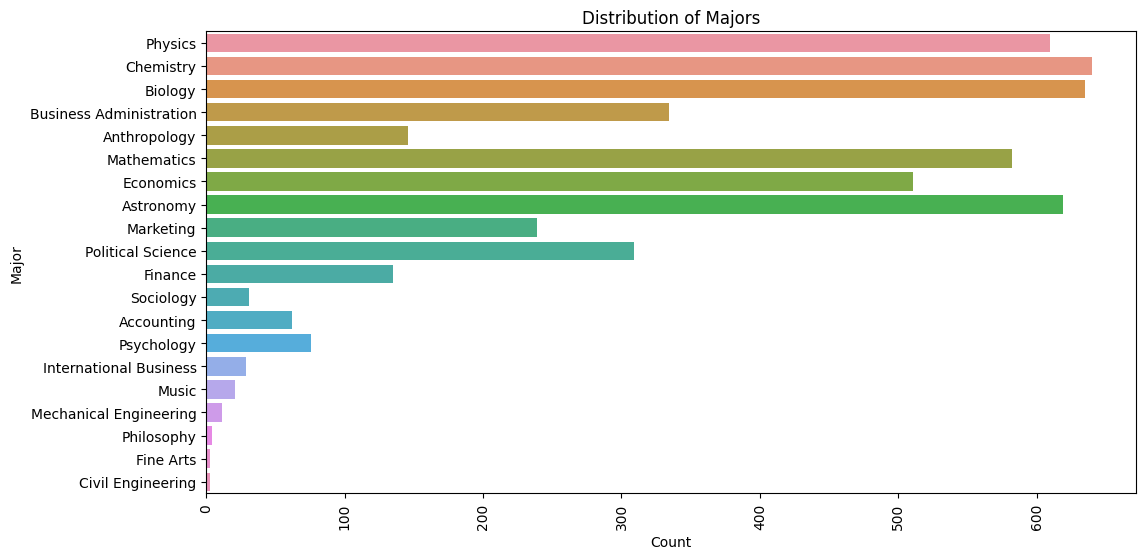

In [9]:
# EDA for Major column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Major')
plt.title('Distribution of Majors')
plt.xlabel('Count')
plt.ylabel('Major')
plt.xticks(rotation=90)
plt.show()



1.   Chemistry is the most ordered major among students, with 640 orders.

2. The next most often requested majors are Chemistry (619 orders), closely followed by Biology (635 orders) and Astronomy (619 orders).

3. It is significant to remember that a number of factors, like the popularity of the major, the size of the student body, and other outside circumstances, may have an impact on the number of orders.


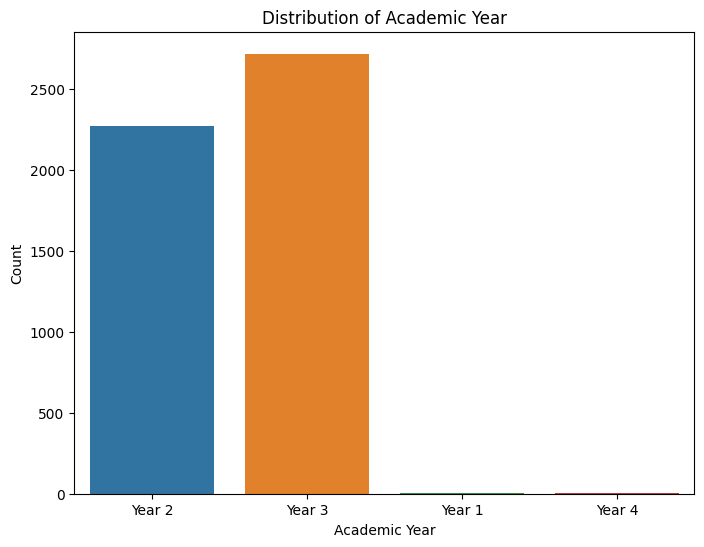

In [10]:
# EDA for Year column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Year')
plt.title('Distribution of Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Count')
plt.show()


With 2,719 orders, students in their third year (Year 3) of academic programs place the majority of orders. This suggests that the most frequent users of the food truck service are third-year students.
With 2,273 orders placed, second-year students also place a sizable amount of orders. Even though there are a few less orders in Year 2 than in Year 3, a sizable chunk of the client base is still represented.
With just five orders placed, first-year students have the fewest orders overall. Based on the information provided, it appears that first-year students do not frequently use the food truck service.

With only three orders, year 4 students have placed even fewer orders. This could mean that fourth-year students aren't making frequent use of the food truck service.
The distribution of orders between academic years is shown by the data, which is useful for developing marketing plans or campaigns that are targeted towards particular student demographics. It's crucial to take into account the dataset's context and whether or not it correctly represents the entire population of students.

These deductions can aid businesses and food truck operators in comprehending how students order during various academic years and in making well-informed selections about operations and promotions.

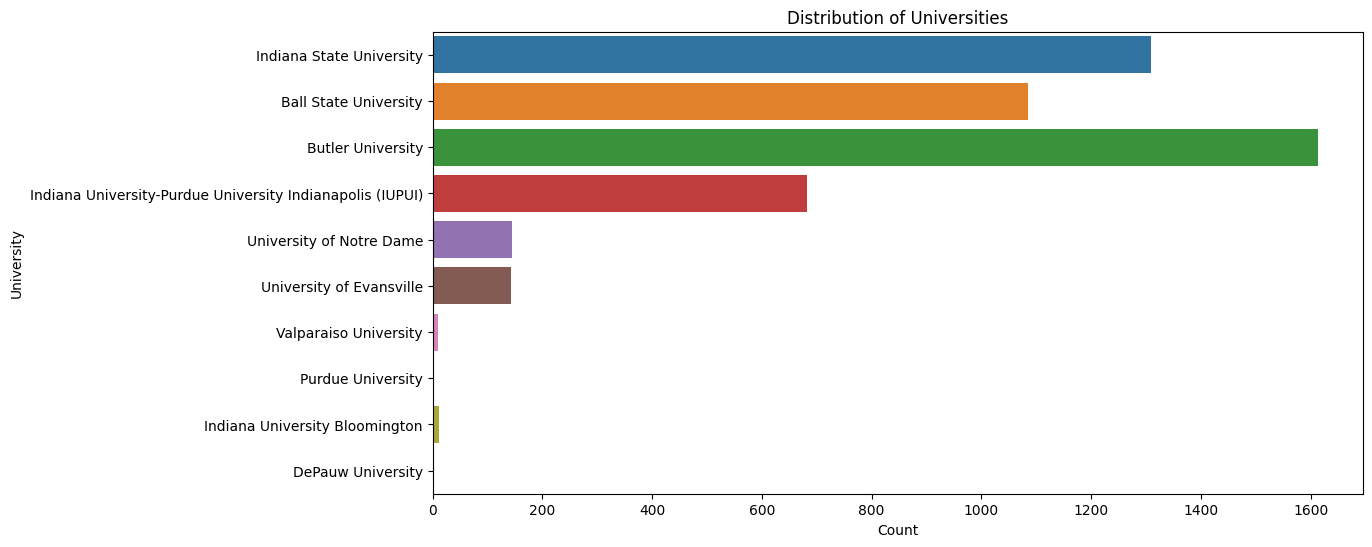

In [11]:
# EDA for University column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='University')
plt.title('Distribution of Universities')
plt.xlabel('Count')
plt.ylabel('University')
plt.show()

Among the universities with the most food truck orders are Butler, Indiana State, and Ball states. This implies that the majority of the food truck service's customers are students from these universities.

Students from Valparaiso University, Purdue University, and DePauw University don't interact much with the food truck service.

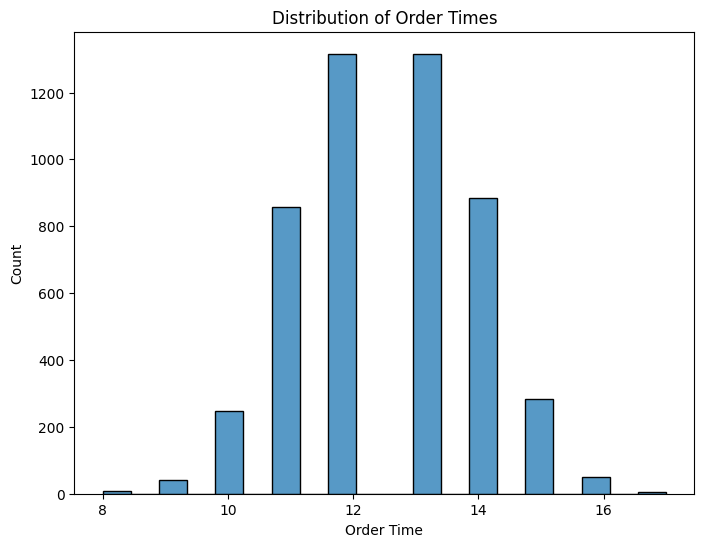

In [12]:
# EDA for Time column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Time', bins=20)
plt.title('Distribution of Order Times')
plt.xlabel('Order Time')
plt.ylabel('Count')
plt.show()

Peak Lunch Hours: With 1316 and 1314 orders, respectively, the hours 13 (1 PM) and 12 (12 PM) have the most food truck orders. This suggests that 12 to 1 PM are the busiest lunch times, with 1 PM being preferred somewhat more.

Non-Peak Hours: There are less orders during hours 9 (9 AM), 8 (8 AM), and 17 (5 PM), with 40, 8, and 4 orders, respectively. Food truck orders are not regarded to be at their highest during these hours.

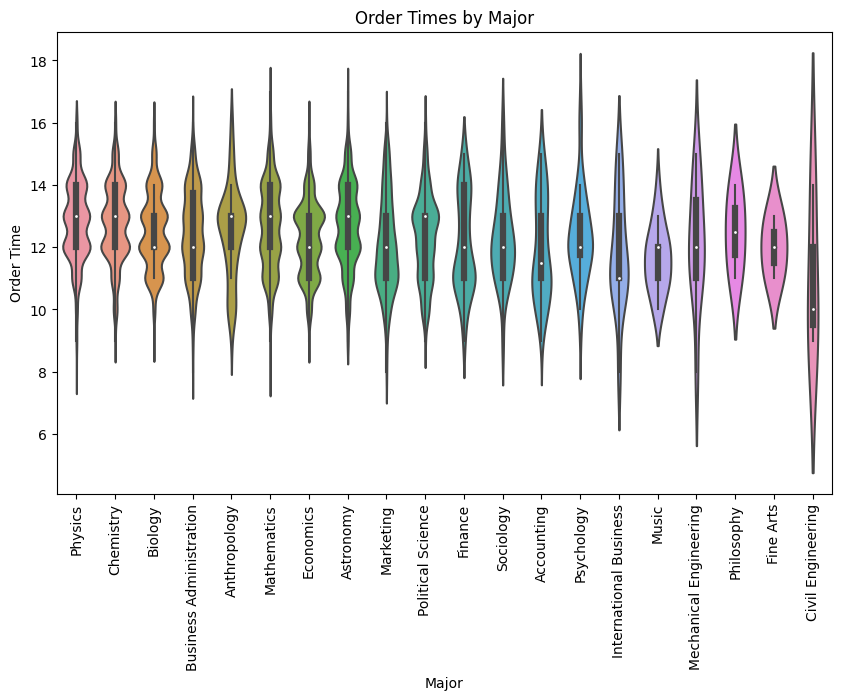

In [13]:
#Relation between Order Times and Major of a Student
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Major', y='Time')
plt.title('Order Times by Major')
plt.xlabel('Major')
plt.ylabel('Order Time')
plt.xticks(rotation=90)
plt.show()

The major type and order time relationship is depicted in this violin plot. The box plot parts indicate that compared to other major categories, the median order time for students majoring in civil engineering is lower.

The distribution's shape—very narrow at each end and broad in the middle—indicates that sociology, psychology, music, and fine arts have highly concentrated order times around the median.

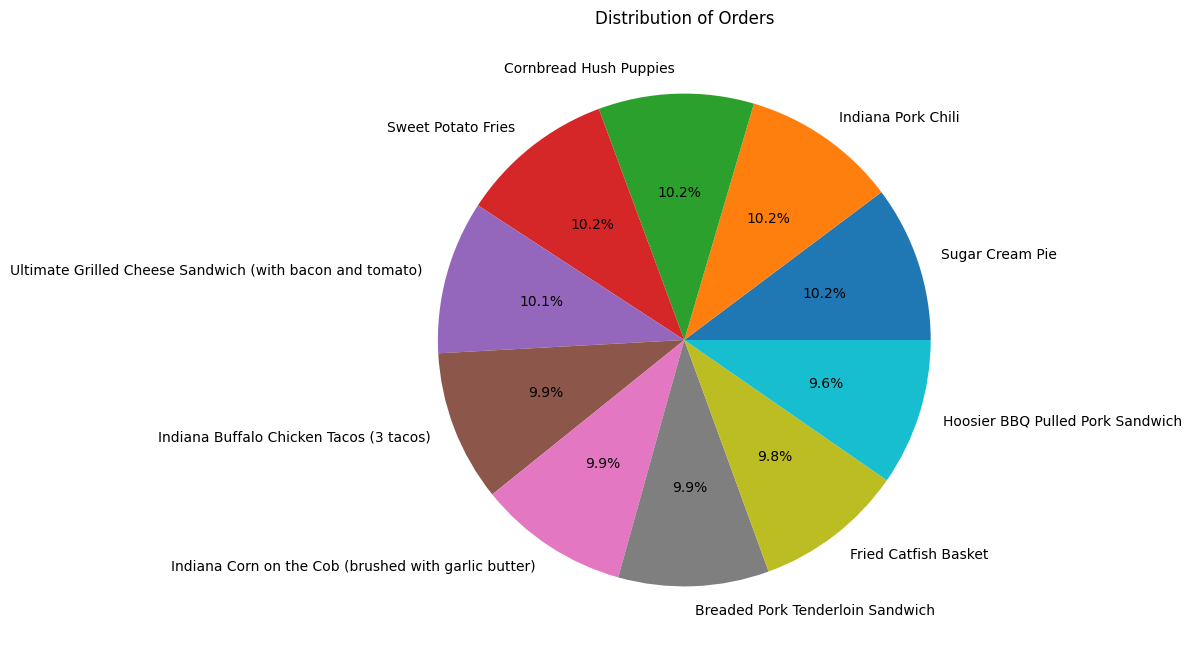

In [14]:
# Example: Creating a pie chart to show the distribution of 'Order'
major_counts = data['Order'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Orders')
plt.show()


1.   This reveals that the distribution of Orders is fairly even among all 10 food items.
2.   However, 'Sugar Cream Pie' is the highest ordered food item.
3.   Indiana Pork Chilli, Cornbread Hush Puppies, Sweet Potato Fries are other most popular item following Sugar Cream Pie.
    




Chi-square test

In [15]:
from scipy.stats import chi2_contingency
# Create a cross-tabulation of 'Major' and 'Order'

for col in ['Major','Year', 'University', 'Time']:
  major_order_crosstab = pd.crosstab(data[col], data['Order'])
  chi2, p, _, _ = chi2_contingency(major_order_crosstab)
  # Display the results
  print(f'Chi-squared value for {col} and Order: {chi2}')
  print(f'p-value: {p}')

Chi-squared value for Major and Order: 3010.7267224941734
p-value: 0.0
Chi-squared value for Year and Order: 2207.6322584878358
p-value: 0.0
Chi-squared value for University and Order: 2927.2433076373422
p-value: 0.0
Chi-squared value for Time and Order: 2907.9011073671586
p-value: 0.0


All four of these predictor variables are significant and relevant in predicting the "Order" that the students make, according to the results of the Chi-squared tests. Using this data, a predictive model that predicts meal orders based on student attributes automatically can be constructed.

# Ethical, Business, and Technical Perspectives

Consideration of data collection, storage, and data biases is essential from ethical, business, and technical perspectives:

1. Implications for Ethics:
* Privacy and Informed Consent: Gathering information about college students—even for marketing purposes—raises privacy issues. Ensuring transparency in data collection and providing students with information about the intended use of their data is imperative. It's critical to get informed permission in order to protect people's privacy.
* Bias and Fairness: Discriminatory and unfair results may arise from data biases. For instance, biased predictions or promotions may result from underrepresentation of particular colleges or majors in your dataset. In order to give every student fair and equal chances, it is imperative that these biases be addressed.

* Data Security: To avoid data breaches or misuse, certain procedures are needed while storing and protecting personal data. When data is not sufficiently protected, privacy violations or identity theft occur, raising ethical problems.

2. Implications for business outcomes:

* Increased customer trust is a result of ethical data processing. Students are more inclined to interact with your app and promotions if they believe that your company handles their data in an ethical and responsible manner.

* Preventing Legal Issues: Failure to uphold data ethics may result in fines and other legal consequences. It is essential to maintain compliance with data protection rules and regulations in order to steer clear of potential legal issues that could endanger your company.

* Reputation and Brand Image: Using ethical data practices has a big impact on a company's reputation and brand image. Negative headlines regarding data exploitation can affect a brand's reputation and customer loyalty over time.

3. Technical Implications:

* Data Quality: Machine learning model quality can be impacted by biases in the data. Predictions that are off can be caused by skewed or unbalanced data, which can be harmful to your company's objectives. It could be required to use data preprocessing techniques like debiasing or oversampling.

* Data Storage and Security: Adequate security measures and data storage are crucial. Serious technological and commercial repercussions may result from data breaches. Take strong cybersecurity precautions to safeguard client information.

* Algorithmic Fairness: It can be difficult to ensure on a technical level that your predictive model does not reinforce biases. To reduce these problems, developing algorithms that take fairness into account and doing bias audits on model predictions are essential.

* Data retention and deletion: Establish guidelines for the deletion and keeping of data. You must erase students' data when they graduate or cease using the app in order to honor their right to be forgotten.

* Data authorizatioin and access: Give users the ability to manage their own data. Give people the choice to consent to or refuse data collection, and let them know how their information will be used.


In conclusion, there is a relationship between technical considerations, business outcomes, and data ethics. In addition to being morally required, ethical data practices have important financial and technological ramifications. They may have an impact on data quality, legal compliance, consumer trust, and the general effectiveness of implementing AI technologies, including meal order prediction. Achieving long-term success while upholding moral integrity requires taking these factors into account.

#MODEL PREDICTIONS


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def prepare_data(data_path):
    # Load the dataset
    data = pd.read_csv(data_path)

    # Encode categorical variables (e.g., 'Year', 'Major', 'University')
    encoder = OneHotEncoder(sparse=False)
    categorical_cols = ['Year', 'Major', 'University']
    encoded_data = encoder.fit_transform(data[categorical_cols])

    # Create a DataFrame with encoded categorical features
    encoded_df = pd.DataFrame(encoded_data, columns= encoder.get_feature_names_out(categorical_cols))

    # Combine encoded features with numerical features ('Time')
    features = pd.concat([encoded_df, data['Time']], axis=1)

    # Target variable
    label_encoder = LabelEncoder()
    target = data['Order']
    target = label_encoder.fit_transform(target)


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [17]:
def train_and_pickle_model(X_train, y_train, model_filename):
    # Model Selection
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Support Vector Machine (SVM)": SVC(),
        "Naive Bayes (Multinomial)": MultinomialNB(),
        "Ensemble (XGBoost)": XGBClassifier(),
    }

    trained_models = {}  # Dictionary to store trained models

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model  # Store the trained model

    # Save the trained models to a pickle file
    with open(model_filename, 'wb') as model_file:
        pickle.dump(trained_models, model_file)



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def test_model(X_test, y_test, model):
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    return accuracy, confusion, report


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Function for testing the model and generating visuals and metrics
def evaluate_model(X_test, y_test, model):
    # Test the model
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy and classification report
    print(f'Accuracy: {accuracy:.2f}')
    print('\nClassification Report:\n', report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Logistic Regression': LogisticRegression(), 'K-Nearest Neighbors (KNN)': KNeighborsClassifier(), 'Support Vector Machine (SVM)': SVC(), 'Naive Bayes (Multinomial)': MultinomialNB(), 'Ensemble (XGBoost)': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
            

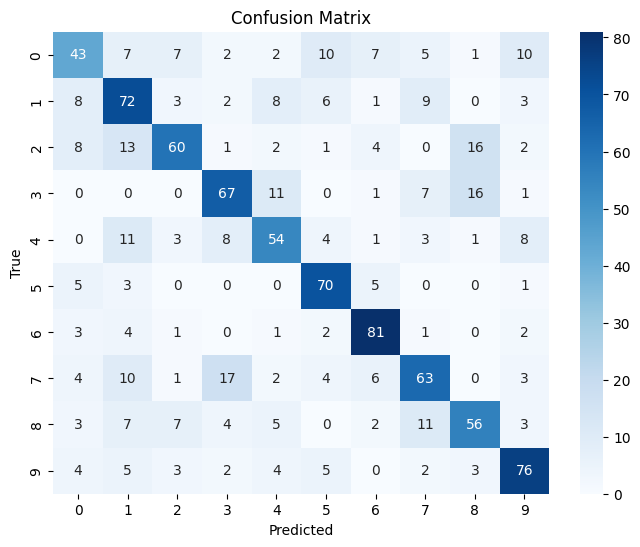

Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        94
           1       0.55      0.64      0.59       112
           2       0.71      0.56      0.62       107
           3       0.65      0.65      0.65       103
           4       0.61      0.58      0.59        93
           5       0.69      0.83      0.75        84
           6       0.75      0.85      0.80        95
           7       0.62      0.57      0.60       110
           8       0.60      0.57      0.59        98
           9       0.70      0.73      0.71       104

    accuracy                           0.64      1000
   macro avg       0.64      0.65      0.64      1000
weighted avg       0.64      0.64      0.64      1000

Model: Random Forest


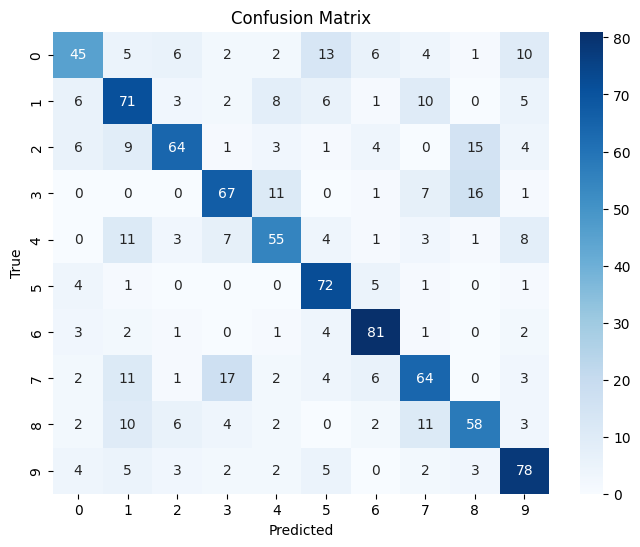

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.48      0.54        94
           1       0.57      0.63      0.60       112
           2       0.74      0.60      0.66       107
           3       0.66      0.65      0.65       103
           4       0.64      0.59      0.61        93
           5       0.66      0.86      0.75        84
           6       0.76      0.85      0.80        95
           7       0.62      0.58      0.60       110
           8       0.62      0.59      0.60        98
           9       0.68      0.75      0.71       104

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.65      0.66      0.65      1000

Model: Logistic Regression


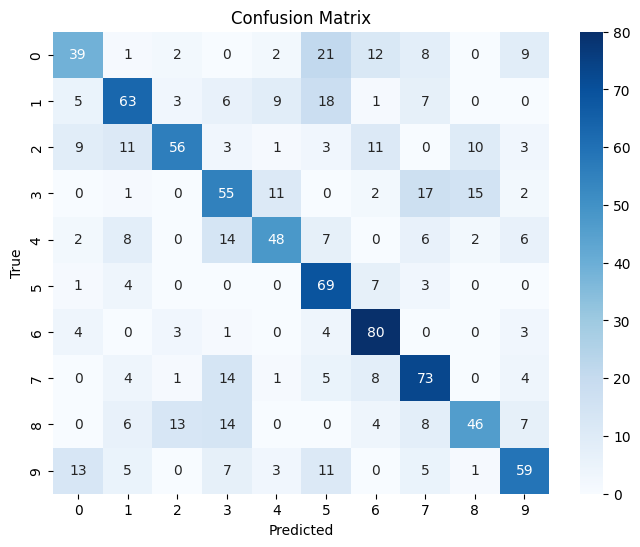

Accuracy: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.41      0.47        94
           1       0.61      0.56      0.59       112
           2       0.72      0.52      0.61       107
           3       0.48      0.53      0.51       103
           4       0.64      0.52      0.57        93
           5       0.50      0.82      0.62        84
           6       0.64      0.84      0.73        95
           7       0.57      0.66      0.62       110
           8       0.62      0.47      0.53        98
           9       0.63      0.57      0.60       104

    accuracy                           0.59      1000
   macro avg       0.60      0.59      0.58      1000
weighted avg       0.60      0.59      0.58      1000

Model: K-Nearest Neighbors (KNN)


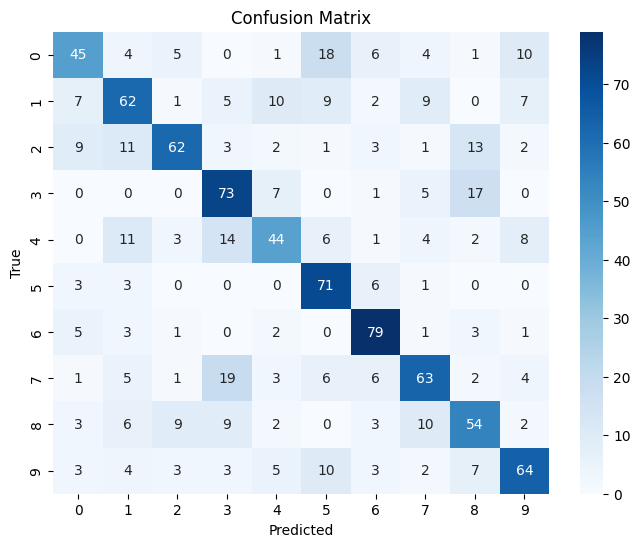

Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        94
           1       0.57      0.55      0.56       112
           2       0.73      0.58      0.65       107
           3       0.58      0.71      0.64       103
           4       0.58      0.47      0.52        93
           5       0.59      0.85      0.69        84
           6       0.72      0.83      0.77        95
           7       0.63      0.57      0.60       110
           8       0.55      0.55      0.55        98
           9       0.65      0.62      0.63       104

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.61      1000
weighted avg       0.62      0.62      0.61      1000

Model: Support Vector Machine (SVM)


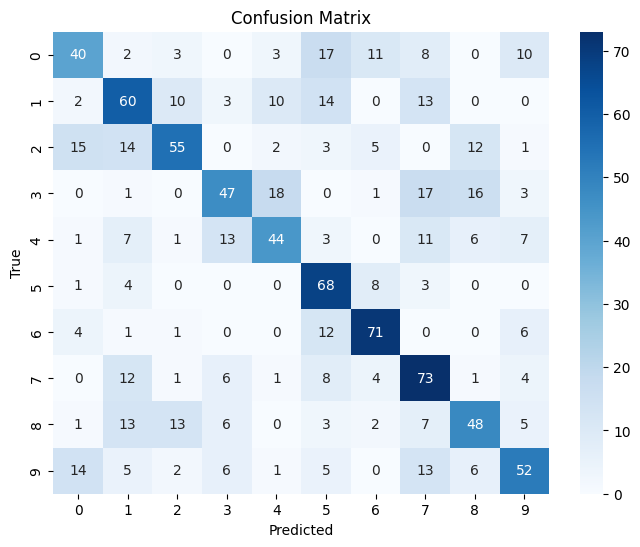

Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.43      0.47        94
           1       0.50      0.54      0.52       112
           2       0.64      0.51      0.57       107
           3       0.58      0.46      0.51       103
           4       0.56      0.47      0.51        93
           5       0.51      0.81      0.63        84
           6       0.70      0.75      0.72        95
           7       0.50      0.66      0.57       110
           8       0.54      0.49      0.51        98
           9       0.59      0.50      0.54       104

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.55      1000

Model: Naive Bayes (Multinomial)


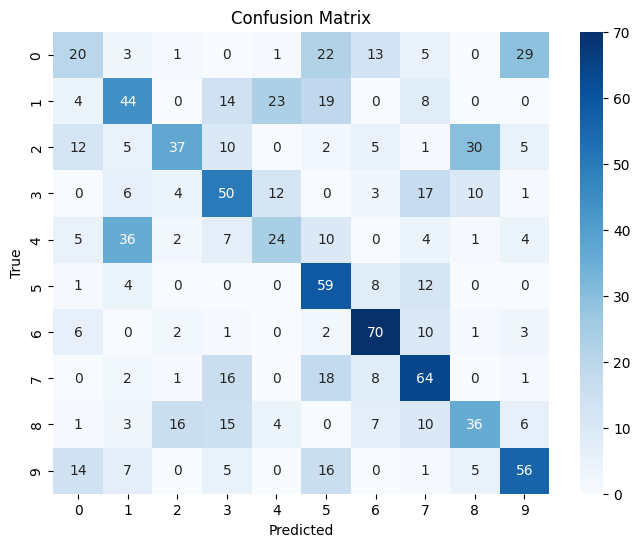

Accuracy: 0.46

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.21      0.25        94
           1       0.40      0.39      0.40       112
           2       0.59      0.35      0.44       107
           3       0.42      0.49      0.45       103
           4       0.38      0.26      0.31        93
           5       0.40      0.70      0.51        84
           6       0.61      0.74      0.67        95
           7       0.48      0.58      0.53       110
           8       0.43      0.37      0.40        98
           9       0.53      0.54      0.54       104

    accuracy                           0.46      1000
   macro avg       0.46      0.46      0.45      1000
weighted avg       0.46      0.46      0.45      1000

Model: Ensemble (XGBoost)


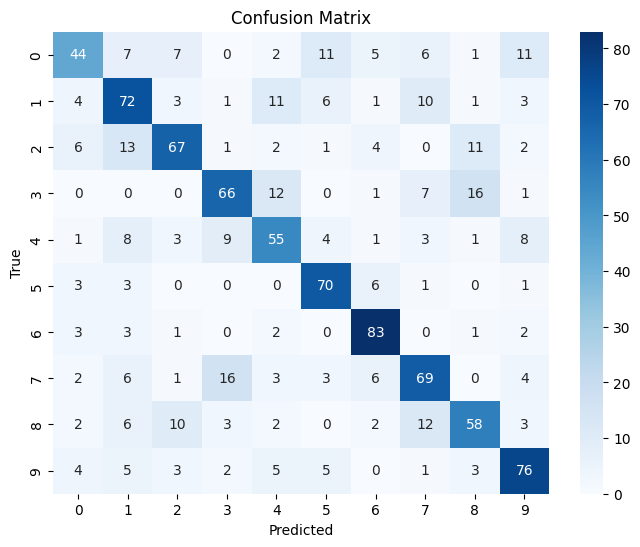

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        94
           1       0.59      0.64      0.61       112
           2       0.71      0.63      0.66       107
           3       0.67      0.64      0.66       103
           4       0.59      0.59      0.59        93
           5       0.70      0.83      0.76        84
           6       0.76      0.87      0.81        95
           7       0.63      0.63      0.63       110
           8       0.63      0.59      0.61        98
           9       0.68      0.73      0.71       104

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



In [20]:
data_path = '/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv'
X_train, X_test, y_train, y_test = prepare_data(data_path)

# Step 2: Train and pickle the model
model_filename = 'food_order_model.pkl'
train_and_pickle_model(X_train, y_train, model_filename)

# Step 3: Load the model from the pickle file
with open(model_filename, 'rb') as model_file:
    trained_models = pickle.load(model_file)

print(trained_models)
# Step 4: Test the models and evaluate them
for model_name, trained_model in trained_models.items():
    print(f"Model: {model_name}")
    evaluate_model(X_test, y_test, trained_model)



#RESULTS

The XGBOOST Model performs with the highest accuracy metrics and can be used as a suitable model for the task.

#AI BASED SYSTEM CREATION DECISION


There are a few key factors to think about when deciding whether to create and use an AI-based system to anticipate food orders for your food truck business. These are important things to consider:

1. Data Quantity and Quality: Evaluate the amount and quality of data that is available for testing and training. Make sure there are enough samples in each class or category and that the dataset is representative and varied.

2. Problem Complexity: Take into account how complicated the prediction problem is. Is it regression (predicting numerical values like order cost) or multi-class (predicting particular food items) categorization, such as order or no order?

3. Model Performance: Carefully assess the AI model(s)' performance. This comprises the mean squared error (MSE) for regression and the F1-score, accuracy, precision, and recall metrics for classification. The selected model needs to fulfill the required performance standards.

4. Interpretability: Examine if the AI model requires interpretability. Complex models like deep neural networks are harder to understand than simpler models like decision trees or linear regression. Gaining clients' trust and providing them with an explanation of forecasts may depend on interpretability.

5. Scalability: Evaluate the solution's scalability. During busy business hours, is the AI model able to manage additional loads? Does the infrastructure allow for scalability to occur?

6. Maintenance and Retraining: In order to adjust to shifting consumer preferences or changing corporate environments, AI models may need to be periodically retrained. Make sure there is a system in place for updating and maintaining the model.

7. Ethical Issues: It is important to take into account the ethical consequences of adopting AI, particularly in the food business. Predictions should not be prejudiced or discriminating. Assure the privacy of your customers.

8. User Experience: Assess how the AI solution affects the way users interact with the system. Does it make ordering easier, or does it make it more difficult and frustrating for customers?

9. Cost-Benefit Analysis: Compare the possible advantages in terms of higher sales and efficiency with the costs of putting the AI solution into practice, including data gathering, model creation, infrastructure, and maintenance.

10. Legal and Regulatory Compliance: Verify that the AI solution conforms to all applicable local, state, and federal laws, particularly those pertaining to data privacy and food safety.

11. A/B Testing: Use A/B testing to assess how well the AI-driven prediction system performs in comparison to other approaches. This can support proving its efficacy and point out areas in need of development.

12. input and Adaptation: Set up procedures for gathering and taking into account employee and consumer input. Updates and enhancements to the model can be based on these comments.

13. company Strategy: Match your overall aims and company strategy with the AI solution. Make sure it advances the goals and mission of your company.


14. Risk Assessment: Determine the possible hazards connected to the AI solution, such as model biases, consumer discontent, and technological malfunctions. Create plans to reduce these hazards.

15. Return on Investment (ROI): Calculate how much money you think using the AI solution will return. Determine the possible income gain or cost savings in relation to the necessary investment.

You may decide whether deploying an AI-based solution for forecasting food orders is a reasonable line of action and fits with your company objectives by carefully weighing these criteria. Before a full-scale rollout, you may also evaluate the solution's impact and obtain real-world insights by executing a pilot or small-scale deployment.



